In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
pd.set_option("display.max_rows", 10)

In [3]:
anime_df = pd.read_csv("anime_filtered.csv")

### Gênero de Animes

Ao analisar o banco de dados, queremos esclarecer se o gênero de um anime pode ou não impactar na sua popularidade.

Separando os dados de forma mais organizada para isso:

In [4]:
## Separando apenas os dados que serão usados
anime_df = anime_df[["anime_id", "title", "score", "rank", "popularity", "genre"]]
anime_df

,anime_id,title,score,rank,popularity,genre
0,11013,Inu x Boku SS,7.63,1274.0,231,"Comedy, Supernatural, Romance, Shounen"
1,2104,Seto no Hanayome,7.89,727.0,366,"Comedy, Parody, Romance, School, Shounen"
2,5262,Shugo Chara!! Doki,7.55,1508.0,1173,"Comedy, Magic, School, Shoujo"
3,721,Princess Tutu,8.21,307.0,916,"Comedy, Drama, Magic, Romance, Fantasy"
4,12365,Bakuman. 3rd Season,8.67,50.0,426,"Comedy, Drama, Romance, Shounen"
...,...,...,...,...,...,...
14469,26089,Gutchonpa Omoshiro Hanashi,5.50,10337.0,13598,Kids
14470,21525,Geba Geba Shou Time!,4.60,10236.0,13284,Comedy
14471,37897,Godzilla: Hoshi wo Kuu Mono,0.00,NaN,7226,"Action, Sci-Fi, Adventure, Fantasy"
14472,34193,Nippon Mukashibanashi: Sannen Netarou,6.00,11557.0,14334,"Fantasy, Kids"


In [10]:
## Tratando dados categóricos de gênero
anime_df["genre"] = anime_df["genre"].str.replace(" ", "")
pd.set_option("display.max_columns", 100)
genres_df = anime_df["genre"].str.get_dummies(sep=',')
anime_df = anime_df.join(genres_df)
anime_df

,anime_id,title,score,rank,popularity,genre,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,MartialArts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,ShoujoAi,Shounen,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,11013,Inu x Boku SS,7.63,1274.0,231,"Comedy,Supernatural,Romance,Shounen",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2104,Seto no Hanayome,7.89,727.0,366,"Comedy,Parody,Romance,School,Shounen",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,5262,Shugo Chara!! Doki,7.55,1508.0,1173,"Comedy,Magic,School,Shoujo",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,721,Princess Tutu,8.21,307.0,916,"Comedy,Drama,Magic,Romance,Fantasy",0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12365,Bakuman. 3rd Season,8.67,50.0,426,"Comedy,Drama,Romance,Shounen",0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14469,26089,Gutchonpa Omoshiro Hanashi,5.50,10337.0,13598,Kids,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14470,21525,Geba Geba Shou Time!,4.60,10236.0,13284,Comedy,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14471,37897,Godzilla: Hoshi wo Kuu Mono,0.00,NaN,7226,"Action,Sci-Fi,Adventure,Fantasy",1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14472,34193,Nippon Mukashibanashi: Sannen Netarou,6.00,11557.0,14334,"Fantasy,Kids",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
## Criando uma lista com todos os gêneros
list_of_genres = genres_df.apply(pd.Series.value_counts).iloc[1].sort_values(ascending = False)
list_of_genres

Comedy       5250
Action       3253
Fantasy      2701
Adventure    2582
Drama        2294
             ... 
Josei          81
ShounenAi      79
ShoujoAi       67
Yuri           41
Yaoi           39
Name: 1, Length: 43, dtype: int64

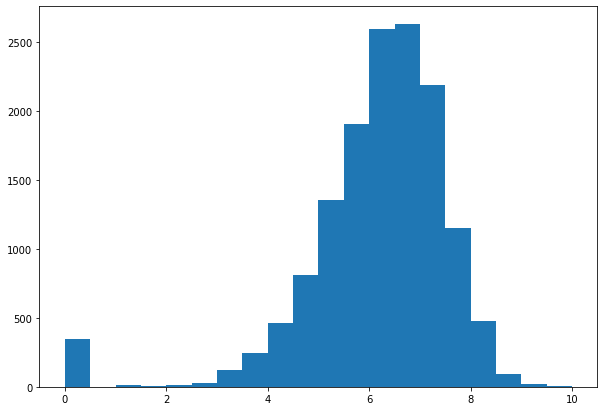

In [11]:
adventure_anime = anime_df.loc[anime_df["Adventure"] == 1]
action_anime = anime_df.loc[anime_df["Action"] == 1]
# Histograma das notas de todos os animes
plt.figure(figsize=(10,7))
plt.hist(anime_df["score"], bins = 20)
plt.show()